For downloading dataset:

https://archive.ics.uci.edu/dataset/2/adult

* Dataset Information
Prediction task is to determine whether a person makes over 50K a year.

* Has Missing Values? Yes

### Listing of attributes:

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.
capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
col=['age','workclass','fnlwgt','education', 'education-num' ,'marital-status'
     ,'occupation','relationship','race','sex','capital-gain','capital-loss'
     ,'hours-per-week','native-country', 'income']

In [135]:
data= pd.read_csv('adult.csv', names = col)

In [136]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [137]:
data.shape

(32561, 15)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [139]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# EDA

### Handeling messing values

In [140]:
data.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [141]:
data.drop(data[data['native-country']==' ?'].index , inplace=True)
data.drop(data[data['occupation']==' ?'].index , inplace=True)

<AxesSubplot:>

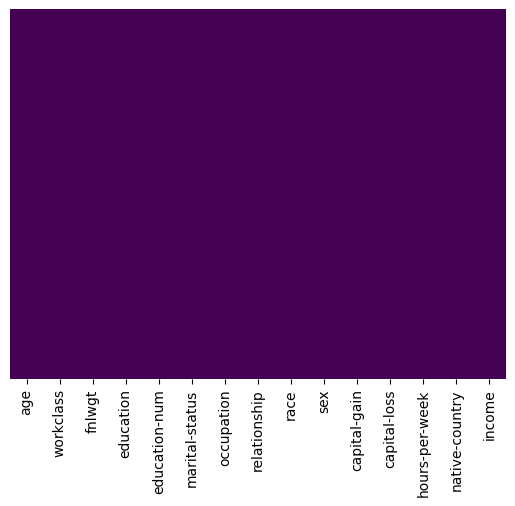

In [142]:
sns.heatmap(data.isin([' ?']),yticklabels=False,cbar=False,cmap='viridis')

In [143]:
data.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Handeling non-numeric columns

In [144]:
dummies_income = pd.get_dummies(data.income , drop_first=True)
dummies_sex = pd.get_dummies(data.sex , drop_first=True)
dummies_race = pd.get_dummies(data.race , drop_first=True)
data = pd.concat([data.drop(['income', 'sex' , 'race'] , axis=1) , dummies_sex, dummies_race, dummies_income], axis=1)

In [145]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['workclass']= encoder.fit_transform(data['workclass'])
data['education']= encoder.fit_transform(data['education'])
data['marital-status']= encoder.fit_transform(data['marital-status'])
data['occupation']= encoder.fit_transform(data['occupation'])
data['relationship']= encoder.fit_transform(data['relationship'])
data['native-country']= encoder.fit_transform(data['native-country'])

<AxesSubplot:>

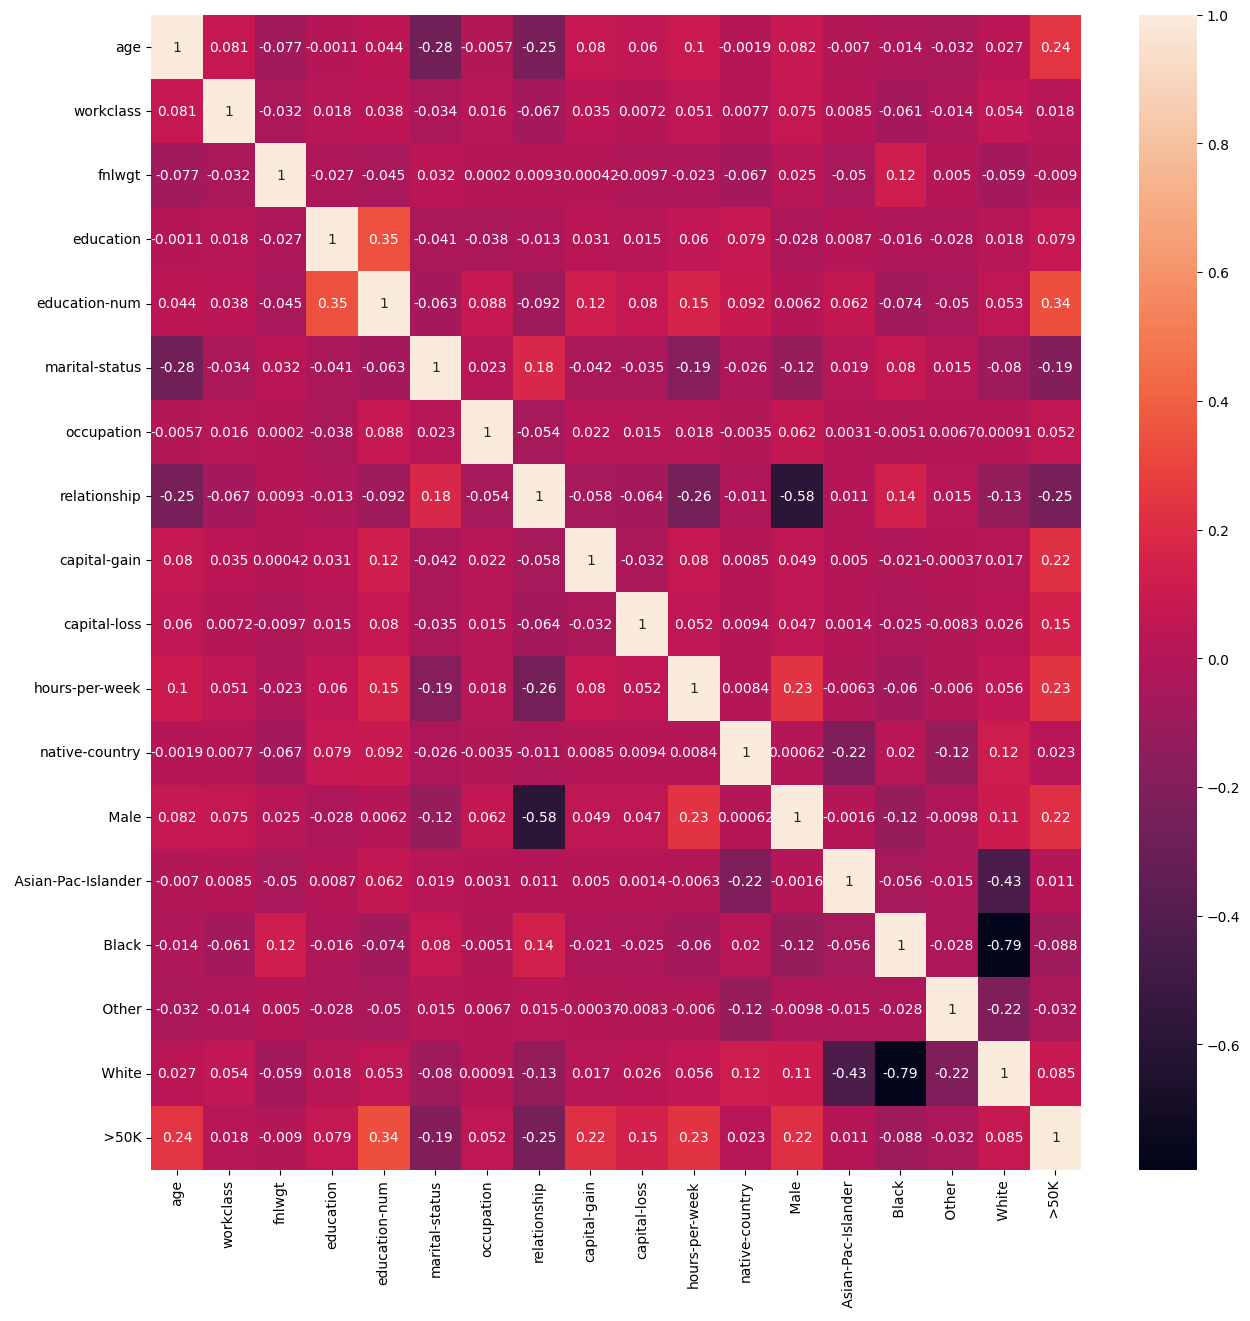

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr() , annot=True)

## Balancing data set

In [147]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=42)

In [148]:
X = data.drop(' >50K' , axis=1)
Y = data[' >50K']

In [149]:
X_os , Y_os = os.fit_resample(X,Y)

In [150]:
data_os = pd.concat([X_os , Y_os] ,axis=1)

<AxesSubplot:ylabel=' >50K'>

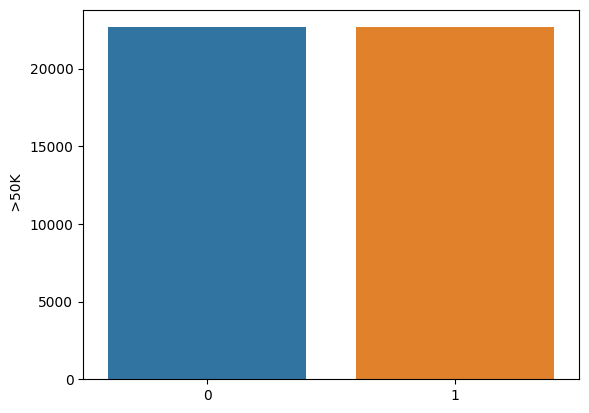

In [151]:
sns.barplot(x= data_os[' >50K'].value_counts().index , y=data_os[' >50K'].value_counts())

## Train test set split

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_os, Y_os, test_size=0.1, random_state=42)

## Normalization

In [153]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Crearing Learning Models

In [154]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
import tensorflow as tf

In [155]:
num_features = len(X_train[0])

In [156]:
early_stopping = EarlyStopping(monitor='val_loss' , mode='min' , patience=20 , verbose=1)

checkpoint_filepath = 'weights.h5'
check_point = ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_accuracy', mode='max', save_best_only=True)

In [157]:
model_nn = Sequential()

model_nn.add(Input(shape=(X_train.shape[1],)))

model_nn.add(Dense(num_features , activation='relu'))
model_nn.add(Dropout(0.5))

model_nn.add(Dense(20 , activation='relu'))
model_nn.add(Dropout(0.5))

model_nn.add(Dense(20 , activation='relu'))
model_nn.add(Dropout(0.5))

model_nn.add(Dense(1 , activation='sigmoid'))

model_nn.compile(loss='binary_crossentropy',
                 optimizer = 'adam',
                 metrics= 'accuracy')

In [158]:
model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 17)                306       
                                                                 
 dropout_3 (Dropout)         (None, 17)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                360       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

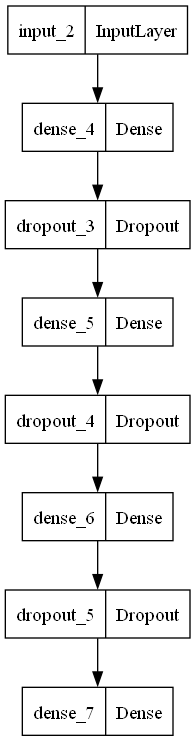

In [159]:
plot_model(model_nn)

In [160]:
model_nn.fit(X_train,y_train,
             epochs=250,
             batch_size= 256,
             validation_split = 0.1,
             callbacks=[early_stopping, check_point])

Epoch 1/250
144/144 [==============================] - 3s 9ms/step - loss: 0.6799 - accuracy: 0.5537 - val_loss: 0.6450 - val_accuracy: 0.6731
Epoch 2/250
144/144 [==============================] - 1s 8ms/step - loss: 0.6433 - accuracy: 0.6418 - val_loss: 0.5921 - val_accuracy: 0.7151
Epoch 3/250
144/144 [==============================] - 1s 8ms/step - loss: 0.6071 - accuracy: 0.6815 - val_loss: 0.5527 - val_accuracy: 0.7305
Epoch 4/250
144/144 [==============================] - 2s 12ms/step - loss: 0.5855 - accuracy: 0.7021 - val_loss: 0.5245 - val_accuracy: 0.7384
Epoch 5/250
144/144 [==============================] - 1s 5ms/step - loss: 0.5623 - accuracy: 0.7150 - val_loss: 0.4971 - val_accuracy: 0.7670
Epoch 6/250
144/144 [==============================] - 1s 7ms/step - loss: 0.5429 - accuracy: 0.7319 - val_loss: 0.4773 - val_accuracy: 0.7845
Epoch 7/250
144/144 [==============================] - 1s 8ms/step - loss: 0.5312 - accuracy: 0.7376 - val_loss: 0.4625 - val_accuracy: 0.796

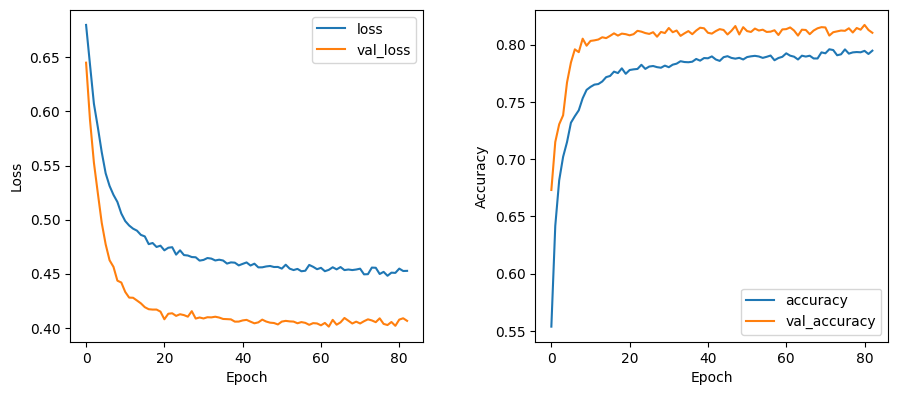

In [161]:
fig, axe = plt.subplots(1,2 , figsize=(10,5))
fig.tight_layout(pad=5.0)

axe[0].plot(model_nn.history.history['loss'], label='loss')
axe[0].plot(model_nn.history.history['val_loss'] , label='val_loss')
axe[1].plot(model_nn.history.history['accuracy'], label='accuracy')
axe[1].plot(model_nn.history.history['val_accuracy'] , label='val_accuracy')

axe[0].set_ylabel('Loss')
axe[0].set_xlabel('Epoch')
axe[1].set_ylabel('Accuracy')
axe[1].set_xlabel('Epoch')

axe[0].legend()
axe[1].legend()


# Or use the following lines:
#model_loss = pd.DataFrame(model_nn.history.history)
#model_loss.plot()

In [162]:
model_nn.load_weights('weights.h5')

In [163]:
predictions_nn = (model_nn.predict(X_test)>0.5).astype(int)

142/142 [==============================] - 0s 2ms/step


In [164]:
from sklearn.metrics import confusion_matrix , classification_report

In [165]:
print(confusion_matrix(y_test, predictions_nn))

[[1741  573]
 [ 272 1945]]


In [166]:
print(classification_report(y_test,predictions_nn ))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      2314
           1       0.77      0.88      0.82      2217

    accuracy                           0.81      4531
   macro avg       0.82      0.81      0.81      4531
weighted avg       0.82      0.81      0.81      4531



In [167]:
acc_nn = classification_report(y_test,predictions_nn , output_dict=True)['accuracy']
acc_nn

0.8135069521077025

### SVC

In [168]:
from sklearn.svm import SVC

In [169]:
model_svc = SVC()

In [170]:
model_svc.fit(X_train, y_train)

SVC()

In [171]:
predictions_svc = model_svc.predict(X_test)

In [172]:
acc_svc = classification_report(y_test,predictions_svc , output_dict=True)['accuracy']
acc_svc

0.8090929154711984

### Random forest classification

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
model_rf = RandomForestClassifier()

In [175]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [176]:
predictions_rf = model_rf.predict(X_test)

In [177]:
acc_rf = classification_report(y_test, predictions_rf, output_dict= True)['accuracy']
acc_rf

0.9346722577797396

In [178]:
accuracy = pd.DataFrame(np.array([[acc_nn], [acc_svc],  [acc_rf]]) , index=['NN','SVC', 'RF'], columns=['Accuracy'])
accuracy

,Accuracy
NN,0.813507
SVC,0.809093
RF,0.934672


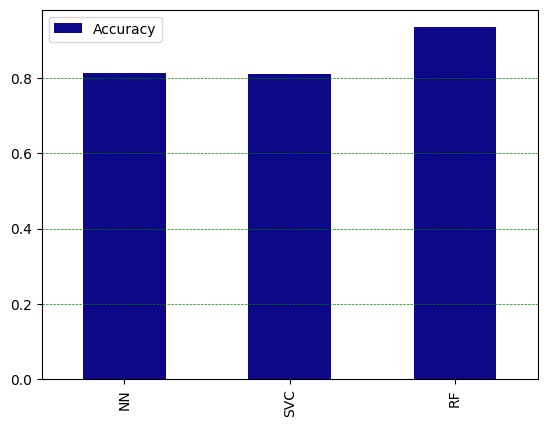

In [131]:
accuracy.plot(kind='bar' , colormap='plasma')
plt.grid(axis='y' , color='green', linestyle='--', linewidth=0.5 )